In [1]:
#MCMC FIT TO HST DATA INCLUDING BOTH ERI II AND CLUSTER, BINNED BY 30 PIXELS, AND MASKED 
#APPROPRIATELY
#PLUMMER PROFILE FOR ERI II, SERSIC PROFILE FOR CLUSTER
#UPDATED TO FIT ALL MODEL PARAMETERS INSTEAD OF JUST RICHNESS AND CENTER POSITION
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.path import Path
from matplotlib.patches import PathPatch
from astropy import wcs
from astropy.io import fits
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib as mpl
# from matplotlib.mlab import rec2csv

import emcee
import corner

# from astropy.io import ascii
import _pickle as cPickle

In [3]:
f = fits.open('/Volumes/Samsung_T5/photRun0520/PISCES-II_f606w/final_drcF606W.fits')
w = wcs.WCS(f[1].header)

In [147]:
cat = np.genfromtxt('/Volumes/Samsung_T5/photRun0520/drcPhot29Apr/catDir_PISCES-II/PISCES-II_fullCat.dat',
                    names=True)


In [148]:
good = np.logical_and(np.logical_and(cat['magr_f606w']<=30,cat['magr_f606w']-cat['magr_f814w']<=0),
                      np.logical_or(cat['six_4_flag_f606w'] == 1,
                       cat['six_4_flag_f814w'] == 1))
# good = np.logical_or(cat['six_4_flag_f606w'] == 1,
#                        cat['six_4_flag_f814w'] == 1)

#                     cat['magRaw_v']<26)

# good = np.logical_and(cat['class_Star_i']>=0.8,
#                       cat['class_Star_v']>=0.8)

In [149]:
cat2 = cat[good]

In [150]:
xgood = cat2['xcenter_f606w']
ygood = cat2['ycenter_f606w']

In [151]:
x0 = 2307.03736948
y0 = 2458.32297505

In [152]:
dist = np.sqrt((xgood-x0)**2 + (ygood-y0)**2)

In [153]:
xuse = xgood[dist <= 1000]
yuse = ygood[dist <= 1000]
cat3 = cat2[dist<=1000]

In [154]:
xgood=xuse
ygood=yuse

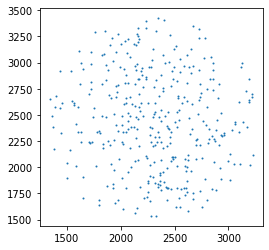

In [155]:
fig, ax = plt.subplots(figsize=(4,4))

ax.scatter(xgood,ygood,s=1)


plt.show()


In [156]:
orientat = -116.9984711105008

In [157]:
theta = np.deg2rad(orientat)
c,s = np.cos(theta), np.sin(theta)

In [158]:
#BEGIN DEFINITION OF A MASK DESCRIBING THE PORTIONS OF THE IMAGE IN WHICH THERE IS DATA
IMAGE = Path([ [225, 4044], 
	[1, 1], 
	[4096, 101], 
	[4217, 4244], 
	[225, 4044]])

GAP = Path([ [100, 2079], 
	[106, 2034], 
	[4156, 2183], 
	[4151, 2231], 
	[100, 2079]])

IMG_BIT = 0b01
GAP_BIT = 0b10

In [159]:
xpath = np.array([225,1,4096,4217,225])
ypath = np.array([4044,1,101,4244,4044])

xgap = np.array([100,106,4156,4151,100])
ygap = np.array([2079,2034,2183,2231,2079])

In [160]:
coords = np.vstack((xgood,ygood))

In [161]:
coords.T.shape

(359, 2)

In [162]:
test = w.wcs_pix2world(coords.T,0)

In [163]:
c2 = np.vstack((344.6345,5.9526))

In [164]:
test2 = w.wcs_world2pix(c2.T,0)

In [165]:
test2

array([[2304.23622908, 2449.98448847]])

In [166]:
x0 = 2307.03736948
y0 = 2458.32297505

In [167]:
xpT = c*(xpath-x0) - s*(ypath-(y0)) + x0
ypT = s*(xpath-x0) + c*(ypath-(y0)) + (y0)
xgT = c*(xgap-x0) - s*(ygap-(y0)) + x0
ygT = s*(xgap-x0) + c*(ygap-(y0)) + (y0)
xT = c*(xgood-x0) - s*(ygood-(y0)) + x0
yT = s*(xgood-x0) + c*(ygood-(y0)) + (y0)

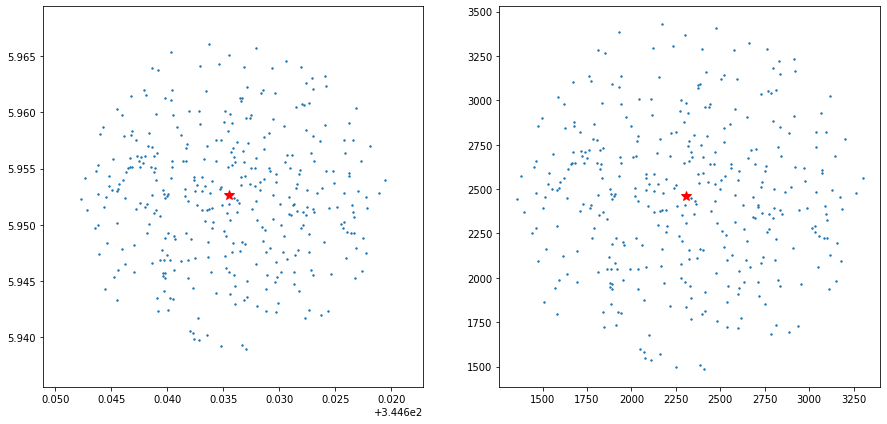

In [168]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,7))

ax1.scatter(test[:,0],test[:,1],s=2)
ax1.plot(344.6345,5.9526,marker='*',color='red',ms=10)
ax2.plot(x0,y0,marker='*',color='red',ms=10)
ax2.scatter(xT,yT,s=2)

ax1.invert_xaxis()

plt.show()

In [169]:
len(xgood)

359

In [170]:
xgood = xT
ygood = yT

In [171]:
# print(xpT)
# print(ypT)

In [172]:
# print(xgT)
# print(ygT)

In [173]:
#BEGIN DEFINITION OF A MASK DESCRIBING THE PORTIONS OF THE IMAGE IN WHICH THERE IS DATA

IMAGE = Path([ [4665, 3594], 
	[1164,5629], 
	[-606,1934], 
	[3031,-54], 
	[4465,3594]])

GAP = Path([ [2971,4597], 
	[2928,4612], 
	[1222,936], 
	[1267,919], 
	[2971,4597]])



IMG_BIT = 0b01
GAP_BIT = 0b10

In [174]:
# keep = cat['six_4_flag_f606w'] == 1
# keep2 = np.logical_and(cat['six_4_flag_f606w'] == 1,
#                        cat['six_4_flag_f814w'] == 1)
# keep3 = np.logical_or(cat['six_4_flag_f606w'] == 1,
#                        cat['six_4_flag_f814w'] == 1)

In [175]:
# fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,7),sharex=True,sharey=True)

# ax1.scatter(cat['magr_f606w']-cat['magr_f814w'],cat['magr_f606w'],s=5)
# ax2.scatter(cat['magr_f606w'][keep3]-cat['magr_f814w'][keep3],cat['magr_f606w'][keep3],s=5)
# ax2.scatter(cat['magr_f606w'][keep]-cat['magr_f814w'][keep],cat['magr_f606w'][keep],s=5)
# ax2.scatter(cat['magr_f606w'][keep2]-cat['magr_f814w'][keep2],cat['magr_f606w'][keep2],s=5)


# ax1.set_ylim(28,20)
# ax1.set_xlim(-1.5,0.5)

# plt.subplots_adjust(wspace=0)
# plt.show()

In [176]:
print(min(xgood))
print(max(xgood))

print(min(ygood))
print(max(ygood))

1355.5521779695741
3299.9632574332713
1483.8396407305318
3431.8241025594025


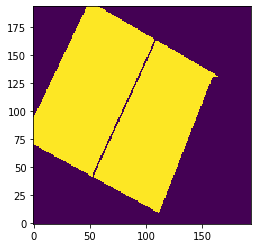

In [177]:
#DEFINE A GRID OF 30X30 PIXEL BINS COVERING THE IMAGE
NBINS = 195
XMIN,XMAX = -350,5500
YMIN,YMAX = -350,5500
XEDGE = np.linspace(XMIN,XMAX,NBINS)
YEDGE = np.linspace(XMIN,XMAX,NBINS)

#BIN CENTERS
XCENT = (XEDGE[1:] + XEDGE[:-1])/2.
YCENT = (YEDGE[1:] + YEDGE[:-1])/2.
#BIN SIZE
XDEL = XEDGE[1]-XEDGE[0]
YDEL = YEDGE[1]-YEDGE[0]

# Pre-calculate these instead of doing it in each evaluation of the model...
XX,YY= np.meshgrid(XCENT,YCENT,indexing='ij')


#USE THE MASKED REGIONS FROM ABOVE TO CREATE AN IMAGE MASK WITH THE APPROPRIATE BINNING
#REQUIRES FLATTENING THE ARRAYS
MASK = np.zeros((NBINS-1,NBINS-1))
image_mask = IMAGE.contains_points(np.vstack([XX.flatten(),YY.flatten()]).T).T.reshape(XX.shape)
gap_mask = GAP.contains_points(np.vstack([XX.flatten(),YY.flatten()]).T).T.reshape(XX.shape)
masked_indices_image = np.where(image_mask==1) # Array indices
masked_indices_gap = np.where(gap_mask==1) # Array indices
MASK[masked_indices_image] = 1
MASK[masked_indices_gap] = 0
IDX = np.where(MASK==1)

#DISPLAY THE MASK TO CHECK THAT IT'S CORRECT
plt.imshow(MASK.T,origin='lower')

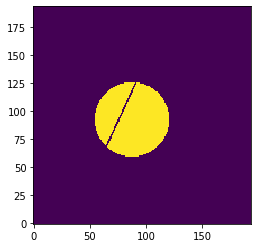

In [178]:
satstar_xcen = x0
satstar_ycen = y0
near_satstar = np.where( np.sqrt((XX - satstar_xcen)**2 + (YY - satstar_ycen)**2) > 1000)

MASK[near_satstar] = 0

plt.imshow(MASK.T,origin='lower')

In [179]:
from scipy.stats import gaussian_kde

In [180]:
xy = np.vstack([xgood,ygood])
z = gaussian_kde(xy)(xy)

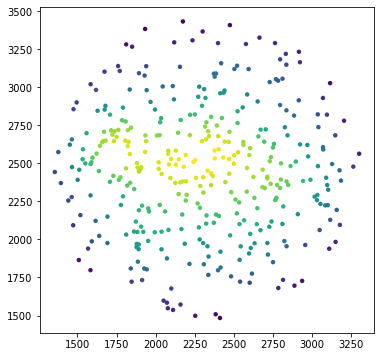

In [181]:
fig,ax=plt.subplots(figsize=(6,6))

ax.scatter(xgood, ygood, c=z, s=20, edgecolor='')
# ax.plot(0,0,color='red',ms=10,marker='*')

# hor_x0 = 2149
# hor_y0 = 2372
plt.show()


In [182]:
#DEFINE INITIAL MODEL PARAMETERS FOR psc2 II
psc2_NSTAR = 1000 
psc2_X0 = 2300                   # X Center (pix)
psc2_Y0 = 2500                   # Y Center (pix)
psc2_EXT = 1.12/60.               # Extension (deg) # radius in arcminutes
psc2_EXT_PIX = psc2_EXT*(3600/0.05)              # Extension (pix)
psc2_ELL = 0.34                # Ellipticity
psc2_PA = 78             # Position angle (deg)
psc2_BG = 0.001

In [183]:
psc2_EXT_PIX

1344.0

In [184]:
def median_interval(data, alpha=0.32):
    """
    Median including Bayesian credible interval.

    Parameters
    ----------
    data  : posterior samples
    alpha : 1 - confidence interval

    Returns
    -------
    [med,[lo, hi]] : median, lower, and upper percentiles
    
    """
    q = [100*alpha/2., 50, 100*(1-alpha/2.)]
    lo,med,hi = np.percentile(data,q)
    return [med,[lo,hi]]

In [185]:
def data(x,y):
    """ Calculate the binned data counts. This only needs to be done
    once (not at each model evaluation), but this seemed easier to
    understand if it paralleled the model counts calculation.

    Parameters
    ----------
    x : the x coordinate of the data
    y : the y coordinate of the data

    Returns
    -------
    data_counts : the data counts in each bin
    """
    data_counts,_,_ = np.histogram2d(x,y,bins=[XEDGE,YEDGE])
    return data_counts

In [186]:
def new_kernel(x,y,lon=psc2_X0,lat=psc2_Y0,ext=psc2_EXT_PIX,ell=psc2_ELL,pa=psc2_PA):
    """ Evaluate the elliptical exponential kernel at coordinates x,y. 
    Normalized to unity over all space...

    Parameters
    ----------
    x: x-coord for evaluating kernel [pix]
    y: y-coord for evaluating kernel [pix]
    lon: x-coord of kernel centroid [pix]
    lat: y-coord of kernel centroid [pix]
    ext: extension [pix]
    ell: ellipticity
    pa:  position angle [deg]

    Returns
    -------
    pdf : probability density (should integrate to unity over all space)
    """

    # Elliptical radius of each x,y coord
    costh = np.cos(np.radians(-pa))
    sinth = np.sin(np.radians(-pa))
    dx = x-lon
    dy = y-lat
    radius = np.sqrt(((dx*costh-dy*sinth)/(1-ell))**2 + (dx*sinth+dy*costh)**2)

    # Exponential radius (re = rh/1.68)
    r_e = ext/1.68 
    #Normalization (integrates to unity over all space) [stars/pix^2)
    norm = 1./(2*np.pi*r_e**2 * (1-ell) )

    # Exponential PDF
    pdf = norm * np.exp(-radius/r_e)

    return pdf

In [187]:
def new_kernel_plummer(x,y,lon=psc2_X0,lat=psc2_Y0,ext=psc2_EXT_PIX,ell=psc2_ELL,pa=psc2_PA):
    """ Evaluate the elliptical Plummer kernel at coordinates x,y. 
    Normalized to unity over all space...

    Parameters
    ----------
    x: x-coord for evaluating kernel [pix]
    y: y-coord for evaluating kernel [pix]
    lon: x-coord of kernel centroid [pix]
    lat: y-coord of kernel centroid [pix]
    ext: extension [pix]
    ell: ellipticity
    pa:  position angle [deg]

    Returns
    -------
    pdf : probability density (should integrate to unity over all space)
    """

    # Elliptical radius of each x,y coord
    costh = np.cos(np.radians(-pa))
    sinth = np.sin(np.radians(-pa))
    dx = x-lon
    dy = y-lat
    radius = np.sqrt(((dx*costh-dy*sinth)/(1-ell))**2 + (dx*sinth+dy*costh)**2)

    #PLUMMER SCALE RADIUS = HALF-LIGHT RADIUS 
    r_e = ext
    #Normalization (integrates to unity over all space?) [stars/pix^2)
    norm = r_e**2/(np.pi*(1-ell))

    # Plummer PDF
    pdf = norm / ((radius**2 + r_e**2)**2)

    return pdf

In [188]:
def model(theta_psc2):
    """ Calculate the binned model counts. This extends over the
    entire pixel range, but we will apply the mask later.

    Parameters
    ----------
    theta : the model parameters
    
    Returns
    -------
    model_counts : the model counts in each bin
    """
    #FIT ALL MODEL PARAMETERS
    richness = theta_psc2[0]
    kwargs = dict(lon=theta_psc2[1],lat=theta_psc2[2],ext=theta_psc2[3],ell=theta_psc2[4],pa=theta_psc2[5])
    #THIS CAN BE USED TO HOLD SOME OF THE PARAMETERS FIXED
    sigma_bg = theta_psc2[6]
    # Default values for the other parameters
    #kwargs.update(ext=ERI_EXT_PIX,ell=ERI_ELL)

    #CHANGE KERNEL CALLED HERE TO USE A DIFFERENT FUNCTIONAL FORM FOR THE SURFACE DENSITY OF THE GALAXY
    # The new kernel in pixel coordinates
    pdf = new_kernel(XX,YY,**kwargs)

#     pdf = new_kernel(XX,YY,**kwargs)

    # Calculate the model predicted counts in each pixel
    pixarea = XDEL*YDEL
    model_counts = richness * pdf * pixarea + sigma_bg
    return model_counts

In [189]:
def lnlike(theta, x, y):
    """ Likelihood function
    Parameters
    ----------
    theta : model parameter array (richness,lon,lat,ext,ell,pa)x2
    x: x-coordinate of data
    y: y-coordinate of data
    
    Returns
    -------
    lnlike: log-likelihood
    """

    #BREAK THETA UP INTO ERI II AND CLUSTER COMPONENTS
    #IF ONLY ONE COMPONENT IS BEING FIT, THEN THESE LINES ARE NOT NEEDED
    theta_psc2 = theta
    
    #commenting out to see if this will run
#     theta_cluster = theta[6:]
    
    # Calculate the data counts and model predicted counts in each pixel bin
    data_counts = data(x,y)
    model_counts_psc2 = model(theta_psc2)
    
    #ditto
#     model_counts_cluster = model_cluster(theta_cluster)
    #TO FIT A SINGLE COMPONENT, USE, E.G., MODEL_COUNTS = MODEL_COUNTS_psc2
    model_counts = model_counts_psc2 #+ model_counts_cluster

    # Apply the mask to the data and model. This selects only pixels
    # in the image for calculating the likelihood.
    data_counts_masked = data_counts[IDX]
    model_counts_masked = model_counts[IDX]
    
    # Evaluate Equation C2 from Drlica-Wagner et al. 2020 (1912.03302; ignore k! term)
    lnlike = np.sum(-model_counts_masked + data_counts_masked * np.log(model_counts_masked))
    return lnlike

In [190]:
def lnprior(theta):
    """ The log-prior. Add whatever you want here... 
    
    Parameters
    ----------
    theta : model parameters

    Returns
    -------
    lnprior : log-prior
    """
    #PRIORS FOR EACH FITTED PARAMETER
    #TO REMOVE ANY PARAMETER FROM THE FIT, REMOVE IT FROM THE LINE BELOW AND ELIMINATE THE CONSTRAINT FOR IT
    
    rich1,lon1,lat1,ext1,ell1,pa1,bg1 = theta[0],theta[1],theta[2],theta[3],theta[4],theta[5],theta[6]

    if not (100 < rich1 < 10000):  return np.inf
    if not (1000 < lon1 < 3500): return np.inf
    if not (1000 < lat1 < 3500): return np.inf
    if not (500 < ext1 < 10000): return np.inf
    if not (0.05 < ell1 < 0.9): return np.inf
    if not (25 < pa1 < 130): return np.inf
    if not (0 < bg1 < 10): return np.inf

    return 0

In [191]:
def lnprob(theta, x, y):
    """ The log-probability = lnlike + lnprob 

    Parameters
    ----------
    theta : the model parameter vector
    x     : x-coord of the data
    y     : y-coord of the data
    
    Returns
    -------
    lnprob : log-probability
    """
    lp = lnprior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + lnlike(theta, x, y)

Running mcmc...


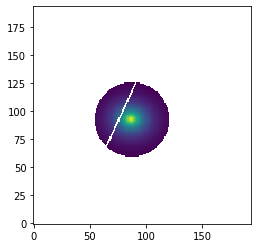

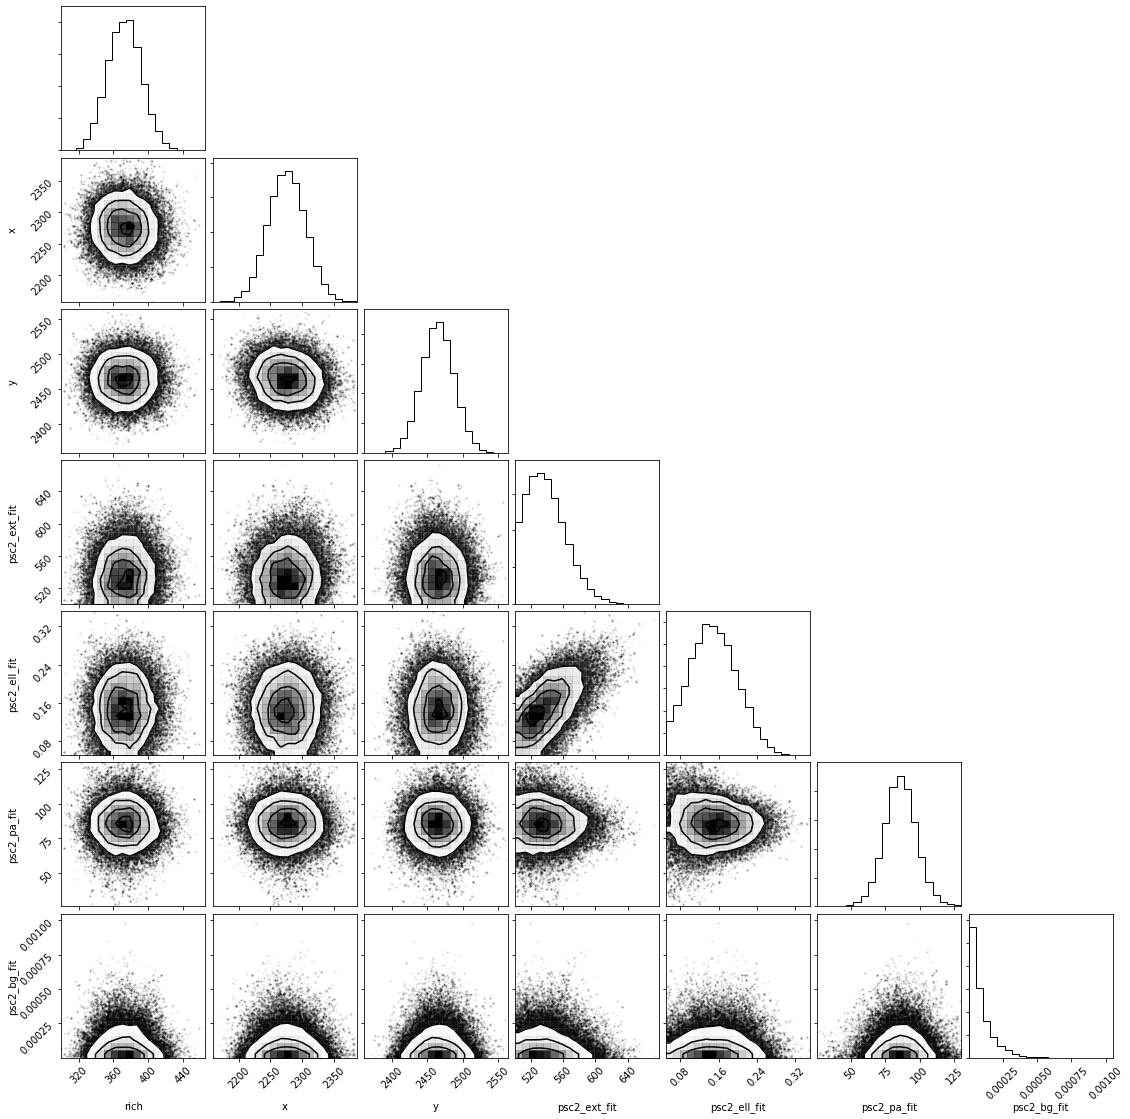

In [192]:
#FLAG FOR DISPLAYING PLOTS
do_plot=True
save_plot=True

#SET INITIAL GUESSES FOR PARAMETERS (ANY PARAMETERS NOT BEING FIT SHOULD BE REMOVED HERE)
THETA = [psc2_NSTAR,psc2_X0,psc2_Y0,psc2_EXT_PIX,psc2_ELL,psc2_PA,psc2_BG]


#PLOT (MASKED, BINNED) OBSERVED SURFACE DENSITY
if do_plot:
    # Example of the masked counts and data
    # (transpose due to difference between imshow and histogram2d...)
    data_counts = data(xgood,ygood)
    data_counts_masked = np.copy(data_counts)
    data_counts_masked[np.where(MASK==0)] = np.nan
#     out_masked_counts = data_counts_masked
    plt.imshow(data_counts_masked.T,origin='lower')
    if save_plot:
        plt.savefig('data_counts_psc2d_expFOV1000.png')
     
    
    # Initialize and run the mcmc
print("Running mcmc...")
ndim, nwalkers = len(THETA), 100
nthreads,nsamples = 16, 2000
nburn = 750
pos = [THETA + 1e-4*np.random.randn(ndim) for i in range(nwalkers)]
     
sampler = emcee.EnsembleSampler(nwalkers,ndim,lnprob,args=(xgood,ygood),
                                threads=nthreads)
sampler.run_mcmc(pos,nsamples)
     
samples = sampler.chain[:, nburn:, :].reshape((-1, ndim))

#MEDIAN VALUES AND +/-1 SIGMA FOR EACH FIT PARAMETER
rich,[rich_min,rich_max] = median_interval(samples[:,0])
x,[xmin,xmax] = median_interval(samples[:,1])
y,[ymin,ymax] = median_interval(samples[:,2])
psc2_ext_fit,[psc2_ext_min,psc2_ext_max] = median_interval(samples[:,3])
psc2_ell_fit,[psc2_ell_min,psc2_ell_max] = median_interval(samples[:,4])
psc2_pa_fit,[psc2_pa_min,psc2_pa_max] = median_interval(samples[:,5])
psc2_bg_fit,[psc2_bg_min,psc2_bg_max] = median_interval(samples[:,6])



if do_plot:
    theta_psc2 = [rich,x,y,psc2_ext_fit,psc2_ell_fit,psc2_pa_fit,psc2_bg_fit]
    model_counts_psc2 = model(theta_psc2)
    model_counts = model_counts_psc2 
    model_counts_masked = np.copy(model_counts)
    model_counts_masked[np.where(MASK==0)] = np.nan
#PLOT (MASKED, BINNED) MODEL SURFACE DENSITY
    plt.imshow(model_counts_masked.T,origin='lower')
    if save_plot:
        plt.savefig('model_counts_psc2d_expFOV1000.png')

#CORNER PLOT    
    fig = corner.corner(samples, labels=["rich", "x", "y", "psc2_ext_fit", "psc2_ell_fit", 
                                         "psc2_pa_fit","psc2_bg_fit"])
    if save_plot:
        fig.savefig("trianglepsc2d_expFOV1000.png")


In [193]:
break

SyntaxError: 'break' outside loop (<ipython-input-193-6aaf1f276005>, line 4)

In [ ]:
cPickle.dump(samples, open( "psc2mcmc2d_exp1.p", "wb" ) )

In [ ]:
outArr = np.array([xgood,ygood])

In [ ]:
outArr.shape

In [ ]:
conv = 0.05/60 # pix to arcmin

In [194]:
res = [rich,rich_max-rich,rich-rich_min,x,xmax-x,x-xmin,y,ymax-y,y-ymin,
       psc2_ext_fit*conv,psc2_ext_max*conv-psc2_ext_fit*conv,psc2_ext_fit*conv-psc2_ext_min*conv,
           psc2_ell_fit,psc2_ell_max-psc2_ell_fit,psc2_ell_fit-psc2_ell_min,
       psc2_pa_fit,psc2_pa_max-psc2_pa_fit,psc2_pa_fit-psc2_pa_min,
      psc2_bg_fit,psc2_bg_max-psc2_bg_fit,psc2_bg_fit-psc2_bg_min]

# print(res)

print('Rich:',rich,rich_max-rich,rich-rich_min)
print('X:',x,xmax-x,x-xmin)
print('Y:',y,ymax-y,y-ymin)
print('Ext (arcmin)',psc2_ext_fit*conv,psc2_ext_max*conv-psc2_ext_fit\
          *conv,psc2_ext_fit*conv-psc2_ext_min*conv)
print('Ell:',psc2_ell_fit,psc2_ell_max-psc2_ell_fit,psc2_ell_fit-psc2_ell_min)
print('PA:',psc2_pa_fit,psc2_pa_max-psc2_pa_fit,psc2_pa_fit-psc2_pa_min)
print('BG:',psc2_bg_fit,psc2_bg_max-psc2_bg_fit,psc2_bg_fit-psc2_bg_min)


Rich: 372.62549839745395 19.221692521516616 19.52738477771328
X: 2275.4683906854834 29.75085895804159 29.36542559759482
Y: 2464.4912531849977 22.64366747728218 22.822270341581316
Ext (arcmin) 0.44700419436439576 0.02276854498924963 0.01821969590592326
Ell: 0.14744868988569654 0.05239918074488234 0.04793028879970904
PA: 85.64279792216226 11.386877724352814 11.35496607421392
BG: 5.953476003381563e-05 0.00010325045772885531 4.488679218847203e-05


In [ ]:
break

In [ ]:
fig, ax = plt.subplots()
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)

im = ax.imshow(data_counts_masked.T,origin='lower', cmap='viridis')

fig.colorbar(im, cax=cax, orientation='vertical')

plt.show()

In [ ]:
fig,ax = plt.subplots(figsize=(5,5))
ax.hist2d(xgood,ygood,bins=(195,195),cmap='viridis')
plt.show()

In [ ]:
cent = np.vstack((x,y))
radec = w.wcs_pix2world(cent.T,0)
print(radec)

In [ ]:
cent2 = np.vstack((344.6341667,5.9545278))
radec = w.wcs_world2pix(cent2.T,0)
print(radec)

In [ ]:
print(x0,y0)

In [ ]:
#EXAMINE RESIDUALS NEAR THE CENTER OF THE GALAXY
plt.imshow(model_counts.T*(1-gap_mask.T)-data_counts.T*(1-gap_mask.T),origin="lower")
plt.colorbar()
plt.xlim(0,195)
plt.ylim(0,195)
plt.clim(-2.5,2.5)

In [ ]:
break # 336.1020000,5.4050000; 
# x0 = 2523.17585813
# y0 = 2395.41373595

In [ ]:
xbin0 = np.ones((195,1))  # (fltarr(80)+1)
xbin1 = np.ones((1,195))  
xbin1[0] = np.arange(0,195,1)
xbin2 = xbin1 * 30 + 0.5*(30)  # 67.5 pixels wide
xbin = np.matmul(xbin0,xbin2)
ybin = xbin.T

# creating x and y arrays to represent the bins across the image

In [ ]:
costh = np.cos(-1 * np.deg2rad(psc2_pa_fit))
sinth = np.sin(-1 * np.deg2rad(psc2_pa_fit))

dx = xbin - x0
dy = ybin - y0

In [ ]:
r1 = (dx * costh - dy * sinth) / (1 - psc2_ell_fit)
r2 = (dx * sinth + dy * costh)

radius = np.sqrt(r1**2 + r2**2)
# calculating distances to different bins in the annuli based on the PA

In [ ]:
r_h = psc2_ext_fit
# norm = r_h**2 / (np.pi * (1-psc2_ell_fit))
# # half light radius squared / (pi * 1-ell)
# pdf = norm/((radius**2 + r_h**2)**2)

#Exponential

r_e = r_h/1.68 
#Normalization (integrates to unity over all space) [stars/pix^2)
norm = 1./(2*np.pi*r_e**2 * (1-psc2_ell_fit) )

# Exponential PDF
pdf = norm * np.exp(-radius/r_e)

In [ ]:
xdel = 30
ydel = 30
pixarea = xdel*ydel  # pixel area in each bin

In [ ]:
model_counts_gal = rich*pdf*pixarea

In [ ]:
# Observed surface density map
binned_surface_density_30 = np.zeros((195,195))
for ii in range(195):
    for jj in range(195):
        idxgood = np.logical_and(np.logical_and(xgood >= (30 * ii),xgood <= (30 * (ii + 1))),
                     np.logical_and(ygood >= (30 * jj),ygood <= (30 * (jj + 1))))

        tmp = np.where(idxgood)[0]
#         # flipping ii and jj because in IDL, it's col, row.
        binned_surface_density_30[jj,ii] = len(tmp)

In [ ]:
# Define annuli
radius1 = radius.flatten()
r1 = (radius1 < (0.1 * r_h)).nonzero()
r2 = ((radius1 < (0.2 * r_h)) & (radius1 >= (0.1 * r_h))).nonzero()
r3 = ((radius1 < (0.3 * r_h)) & (radius1 >= (0.2 * r_h))).nonzero()
r4 = ((radius1 < (0.4 * r_h)) & (radius1 >= (0.3 * r_h))).nonzero()
r5 = ((radius1 < (0.5 * r_h)) & (radius1 >= (0.4 * r_h))).nonzero()
r6 = ((radius1 < (0.6 * r_h)) & (radius1 >= (0.5 * r_h))).nonzero()
r7 = ((radius1 < (0.7 * r_h)) & (radius1 >= (0.6 * r_h))).nonzero()
r8 = ((radius1 < (0.8 * r_h)) & (radius1 >= (0.7 * r_h))).nonzero()
r9 = ((radius1 < (0.9 * r_h)) & (radius1 >= (0.8 * r_h))).nonzero()
r10 = ((radius1 < r_h) & (radius1 >= (0.9 * r_h))).nonzero()

In [ ]:
# areas of annuli in arcmin**2
pix_per_arcsec=20

a1 = (np.pi*(r_h*0.1)**2*(1-psc2_ell_fit))/(pix_per_arcsec*60)**2
a2 = (np.pi*(r_h*0.2)**2*(1-psc2_ell_fit) - np.pi*(r_h*0.1)**2*(1-psc2_ell_fit))/(pix_per_arcsec*60)**2
a3 = (np.pi*(r_h*0.3)**2*(1-psc2_ell_fit) - np.pi*(r_h*0.2)**2*(1-psc2_ell_fit))/(pix_per_arcsec*60)**2
a4 = (np.pi*(r_h*0.4)**2*(1-psc2_ell_fit) - np.pi*(r_h*0.3)**2*(1-psc2_ell_fit))/(pix_per_arcsec*60)**2
a5 = (np.pi*(r_h*0.5)**2*(1-psc2_ell_fit) - np.pi*(r_h*0.4)**2*(1-psc2_ell_fit))/(pix_per_arcsec*60)**2
a6 = (np.pi*(r_h*0.6)**2*(1-psc2_ell_fit) - np.pi*(r_h*0.5)**2*(1-psc2_ell_fit))/(pix_per_arcsec*60)**2
a7 = (np.pi*(r_h*0.7)**2*(1-psc2_ell_fit) - np.pi*(r_h*0.6)**2*(1-psc2_ell_fit))/(pix_per_arcsec*60)**2
a8 = (np.pi*(r_h*0.8)**2*(1-psc2_ell_fit) - np.pi*(r_h*0.7)**2*(1-psc2_ell_fit))/(pix_per_arcsec*60)**2
a9 = (np.pi*(r_h*0.9)**2*(1-psc2_ell_fit) - np.pi*(r_h*0.8)**2*(1-psc2_ell_fit))/(pix_per_arcsec*60)**2
a10 = (np.pi*(r_h*1.0)**2*(1-psc2_ell_fit) - np.pi*(r_h*0.9)**2*(1-psc2_ell_fit))/(pix_per_arcsec*60)**2

In [ ]:
dist_x = np.array([r_h*0.1,r_h*0.2,r_h*0.3,r_h*0.4,r_h*0.5,r_h*0.6,r_h*0.7,r_h*0.8,r_h*0.9,r_h])/1200

In [ ]:
binned_surface_density_30f = binned_surface_density_30.flatten()
model_counts_galf = model_counts_gal.flatten()
# model_counts_expf = model_counts_exp.flatten()
data_1d = [binned_surface_density_30f[r1].sum()/a1,
           binned_surface_density_30f[r2].sum()/a2,
           binned_surface_density_30f[r3].sum()/a3,
           binned_surface_density_30f[r4].sum()/a4,
           binned_surface_density_30f[r5].sum()/a5,
           binned_surface_density_30f[r6].sum()/a6,
           binned_surface_density_30f[r7].sum()/a7,
           binned_surface_density_30f[r8].sum()/a8,
           binned_surface_density_30f[r9].sum()/a9,
           binned_surface_density_30f[r10].sum()/a10]

model_1d = [model_counts_galf[r1].sum()/a1,
            model_counts_galf[r2].sum()/a2,
            model_counts_galf[r3].sum()/a3,
            model_counts_galf[r4].sum()/a4,
            model_counts_galf[r5].sum()/a5,
            model_counts_galf[r6].sum()/a6,
            model_counts_galf[r7].sum()/a7,
            model_counts_galf[r8].sum()/a8,
            model_counts_galf[r9].sum()/a9,
            model_counts_galf[r10].sum()/a10]


In [ ]:
# def plummer(radius,rich,r_h,ell):
    
#     # Everything needs to be in pixel units
    
#     term1 = rich / (np.pi * r_h**2 * (1-ell))
#     term2 = (1 + (radius**2/r_h**2))**(-2)
    
#     return term1 * term2

In [ ]:
# ptest = plummer(dist_x*1200,rich,psc2_ext_fit,psc2_ell_fit)

In [ ]:
def exponential(radius,rich,r_h,ell):
    
    # Everything needs to be in pixel units
    r_e = r_h/1.68
    
    term1 = rich / (2 * np.pi * r_e**2 * (1-ell))
    term2 = np.exp(-1*radius/r_e)
    
    return term1 * term2

In [ ]:
exptest = exponential(dist_x*1200,rich,psc2_ext_fit,psc2_ell_fit)

In [ ]:
bkg_add = psc2_bg_fit * (20**2) * (60**2) / 30**2

In [ ]:
fig, ax = plt.subplots(figsize=(9,7))

ax.scatter(dist_x,data_1d,label='Data')
ax.plot(dist_x,model_1d + bkg_add,label='Exponential PDF')
ax.plot(dist_x,exptest*(1200**2)+ bkg_add,label='Exponential Function')
# ax.plot(dist_x,model_1de,label='Model Exp')
# ax.hlines(bkg_add,1e-1,3)

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_ylabel(r'log[$\Sigma_N$ (stars arcmin$^{-1}$)]',fontsize=16)
ax.set_xlabel(r'log[R (arcmin)]',fontsize=16)
ax.set_title('Psc II',fontsize=20)

ax.set_xticks([1, 2])
ax.get_xaxis().set_major_formatter(mpl.ticker.ScalarFormatter())



ax.legend()
# plt.savefig('figures/sgr2.png')
plt.show()

In [ ]:
#EXAMINE RESIDUALS NEAR THE CENTER OF THE GALAXY
plt.imshow(model_counts.T*(1-gap_mask.T)-data_counts.T*(1-gap_mask.T),origin="lower")
plt.colorbar()
plt.xlim(70,170)
plt.ylim(70,170)
plt.clim(-2.5,2.5)